# JBIG코드실습_타이타닉(2주차)

이정재  
2024-03-24

In [1]:
import pandas as pd
import numpy as np


In [2]:
train = pd.read_csv('./train_2.csv')
train.head()

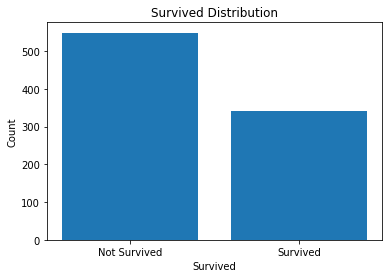

In [3]:
# Matplolib 으로 Survived의 분포 확인
import matplotlib.pyplot as plt

survived_counts = train['Survived'].value_counts()

# 막대 그래프 그리기
plt.bar(survived_counts.index, survived_counts.values)

# 그래프에 제목과 레이블 추가
plt.title('Survived Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')

# x축의 눈금 레이블 설정
plt.xticks(survived_counts.index, ['Not Survived', 'Survived'])

# 그래프 출력
plt.show()



In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 불러오기
train = pd.read_csv('./train_2.csv')

# 전처리 (필요시 전처리 추가할 것)#########################################################################
train['Age'] = train['Age'].fillna(29)
train['Sex'] = train['Sex'].map({'male': 1, 'female': 0})
# 위 5개 칼럼만 사용할 것
train = train[[ 'Pclass', 'SibSp', 'Age', 'Sex', 'Survived']] 

# X값과 y값 구하기
X = train.drop(columns=['Survived'])
y = train['Survived']

# 데이터 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# 스케일링과 데이터 인코딩이 필요한 칼럼을 확인한 후 전처리를 진행하세요


In [15]:
# PyCaret으로 가장 좋은 성능을 보이는 모델을 찾으세요.
from pycaret.classification import *
# PyCaret 설정
exp1 = setup(train, target='Survived', session_id=123,use_gpu=True) 

# 모델 비교 및 평가
best_model = compare_models()


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [16]:
# PyCaret에서 찾은 모델을 
# 직접 sklearn의 GridSearch를 통해 하이퍼 파라미터를 튜닝해보세요.

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Gradient Boosting Classifier 모델 정의
gb_classifier = GradientBoostingClassifier()

# 탐색할 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# 최적의 하이퍼파라미터와 점수 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
Best Score: 0.8327788588286987

In [17]:
# best params로 교차검증 및 StratifiedKFold를 진행하세요.
# 최적의 하이퍼파라미터로 교차검증 및 StratifiedKFold 진행
from sklearn.model_selection import cross_val_score, StratifiedKFold
best_params = grid_search.best_params_
gb_classifier = GradientBoostingClassifier(**best_params)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(gb_classifier, X, y, cv=stratified_kfold)

# 교차검증 결과 출력
print("Cross Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross Validation Scores: [0.84916201 0.8258427  0.79775281 0.80898876 0.83707865]
Mean CV Score: 0.8237649865042999

In [21]:
# 앙상블 기법 중 배깅을 사용해보세요.

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 배깅 분류기 정의
bagging_classifier = BaggingClassifier(gb_classifier, n_estimators=10, random_state=42)

# 배깅 분류기를 훈련 데이터에 적합
gb_classifier.fit(X, y)

# 테스트 데이터에 대한 예측
y_pred = gb_classifier.predict(X)

# 정확도 평가
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8731762065095399